In [1]:
import numpy as np 
import pandas as pd 
import os

dir_list = []
for dirname, _, filenames in os.walk(r'C:\Users\Hello\Downloads\full braille augmented dataset'):
    for filename in filenames:
        dir_list.append(os.path.join(dirname, filename))

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import cv2

In [3]:
name_list = []

for i in dir_list:
    name_list.append(os.path.basename(i)[:3])
   

In [4]:
len(name_list)

22148

In [5]:
name_list

['001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '001',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',
 '002',


In [6]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [7]:
images

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
         [  2,   2,   2],
         [  2,   2,   2]],
 
        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2]],
 
        [[  5,   5,   5],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [  4,   4,   4],
         [  4,   4,   4],
         [  4,   4,   4]],
 
        ...,
 
        [[251, 251, 251],
         [255, 255, 255],
         [245, 245, 245],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2],
         ...,
         [  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3]],
 
        [[  2,   2,   2],
         [  2,   2,   2],
         [  2,   2,   2],
         ...,
         [  3,   3,   3],
  

In [8]:
images_list = np.array(images )/255.0
name_list = np.array(name_list)

In [9]:
nodup = tuple(set(name_list))
print(sorted(nodup))

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143'

In [10]:
print(len(name_list))

22148


(22148, 170, 96, 3)

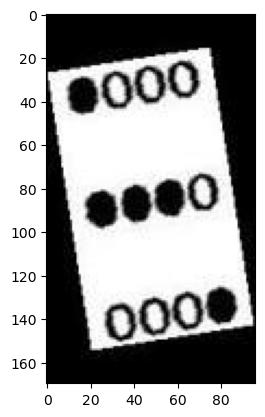

In [11]:
plt.imshow(images_list[9])
images_list.shape


In [12]:
name_list.shape
le = LabelEncoder()
name_list =le.fit_transform(name_list)


In [13]:
images_list.shape

(22148, 170, 96, 3)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=108)

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=196, activation="softmax") 
    #this better
])

In [17]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")


history = model.fit(x=X_train,
                    y=y_train,
                    epochs=5,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 173s 436ms/step - loss: 3.4284 - sparse_categorical_accuracy: 0.3263 - val_loss: 0.0525 - val_sparse_categorical_accuracy: 0.9829
Epoch 2/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 161s 414ms/step - loss: 0.0654 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0051 - val_sparse_categorical_accuracy: 0.9983
Epoch 3/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 157s 405ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9898 - val_loss: 0.0968 - val_sparse_categorical_accuracy: 0.9733
Epoch 4/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 165s 425ms/step - loss: 0.0235 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0543 - val_sparse_categorical_accuracy: 0.9947
Epoch 5/5
388/388 ━━━━━━━━━━━━━━━━━━━━ 167s 430ms/step - loss: 0.0155 - sparse_categorical_accuracy: 0.9991 - val_loss: 0.0048 - val_sparse_categorical_accuracy: 0.9996


In [20]:
name_list_final =[]

for i in dir_list:
    name_list_final.append(os.path.basename(i)[:3])
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Top three most likely predictions:
Prediction #1: Index 147 with letter 'ገ'
Prediction #2: Index 133 with letter 'ደ'
Prediction #3: Index 140 with letter 'ጀ'
Prediction #4: Index 149 with letter 'ጊ'
Prediction #5: Index 182 with letter 'ፈ'


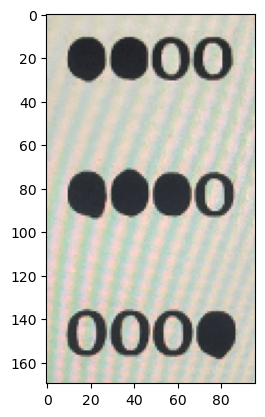

In [46]:
# Load the image
img = cv2.imread(r"C:\Users\Hello\Downloads\a\ge.jpg")

# Define custom labels
custom_labels = {
    0: "ሀ", 1: "ሁ", 2: "ሂ", 3: "ሃ", 4: "ሄ", 5: "ህ", 6: "ሆ",
    7: "ለ", 8: "ሉ", 9: "ሊ", 10: "ላ", 11: "ሌ", 12: "ል", 13: "ሎ",
    14: "መ", 15: "ሙ", 16: "ሚ", 17: "ማ", 18: "ሜ", 19: "ም", 20: "ሞ",
    21: "ሠ", 22: "ሡ", 23: "ሢ", 24: "ሣ", 25: "ሤ", 26: "ሥ", 27: "ሦ",
    28: "ረ", 29: "ሩ", 30: "ሪ", 31: "ራ", 32: "ሬ", 33: "ር", 34: "ሮ",
    35: "ሸ", 36: "ሹ", 37: "ሺ", 38: "ሻ", 39: "ሼ", 40: "ሽ", 41: "ሾ",
    42: "ቀ", 43: "ቁ", 44: "ቂ", 45: "ቃ", 46: "ቄ", 47: "ቅ", 48: "ቆ",
    49: "በ", 50: "ቡ", 51: "ቢ", 52: "ባ", 53: "ቤ", 54: "ብ", 55: "ቦ",
    56: "ተ", 57: "ቱ", 58: "ቲ", 59: "ታ", 60: "ቴ", 61: "ት", 62: "ቶ",
    63: "ቸ", 64: "ቹ", 65: "ቺ", 66: "ቻ", 67: "ቼ", 68: "ች", 69: "ቾ",
    70: "ነ", 71: "ኑ", 72: "ኒ", 73: "ና", 74: "ኔ", 75: "ን", 76: "ኖ",
    77: "ኘ", 78: "ኙ", 79: "ኚ", 80: "ኛ", 81: "ኜ", 82: "ኝ", 83: "ኞ",
    84: "አ", 85: "ኡ", 86: "ኢ", 87: "ኣ", 88: "ኤ", 89: "እ", 90: "ኦ",
    91: "ከ", 92: "ኩ", 93: "ኪ", 94: "ካ", 95: "ኬ", 96: "ክ", 97: "ኮ",
    98: "ኸ", 99: "ኹ", 100: "ኺ", 101: "ኻ", 102: "ኼ", 103: "ኽ", 104: "ኾ",
    105: "ወ", 106: "ዉ", 107: "ዊ", 108: "ዋ", 109: "ዌ", 110: "ው", 111: "ዎ",
    112: "ዘ", 113: "ዙ", 114: "ዚ", 115: "ዛ", 116: "ዜ", 117: "ዝ", 118: "ዞ",
    119: "ዠ", 120: "ዡ", 121: "ዢ", 122: "ዣ", 123: "ዤ", 124: "ዥ", 125: "ዦ",
    126: "የ", 127: "ዩ", 128: "ዪ", 129: "ያ", 130: "ዬ", 131: "ይ", 132: "ዮ",
    133: "ደ", 134: "ዱ", 135: "ዲ", 136: "ዳ", 137: "ዴ", 138: "ድ", 139: "ዶ",
    140: "ጀ", 141: "ጁ", 142: "ጂ", 143: "ጃ", 144: "ጄ", 145: "ጅ", 146: "ጆ",
    147: "ገ", 148: "ጉ", 149: "ጊ", 150: "ጋ", 151: "ጌ", 152: "ግ", 153: "ጎ",
    154: "ጠ", 155: "ጡ", 156: "ጢ", 157: "ጣ", 158: "ጤ", 159: "ጥ", 160: "ጦ",
    161: "ጨ", 162: "ጩ", 163: "ጪ", 164: "ጫ", 165: "ጬ", 166: "ጭ", 167: "ጮ",
    168: "ጰ", 169: "ጱ", 170: "ጲ", 171: "ጳ", 172: "ጴ", 173: "ጵ", 174: "ጶ",
    175: "ፀ", 176: "ፁ", 177: "ፂ", 178: "ፃ", 179: "ፄ", 180: "ፅ", 181: "ፆ",
    182: "ፈ", 183: "ፉ", 184: "ፊ", 185: "ፋ", 186: "ፌ", 187: "ፍ", 188: "ፎ",
    189: "ፐ", 190: "ፑ", 191: "ፒ", 192: "ፓ", 193: "ፔ", 194: "ፕ", 195: "ፖ"
}


# Check if image is loaded successfully
if img is not None:
    # Resize image
    resized_img = cv2.resize(img, (96, 170))
    
    # Normalize image
    normalized_img = resized_img / 255.0
    
    # Ensure batch dimension
    input_img_with_batch = np.expand_dims(normalized_img, axis=0)
    
    # Visualize the image
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    
    # Assuming model.predict function expects normalized input
    prediction = model.predict(input_img_with_batch)
    
    # Get the top three most likely indices
    top_three_indices = np.argsort(prediction[0])[::-1][:5]
    
    # Print the top three predicted indices and their corresponding labels
    print("Top three most likely predictions:")
    for i, index in enumerate(top_three_indices):
        custom_label = custom_labels.get(index, "Unknown")
        print(f"Prediction #{i+1}: Index {index} with letter '{custom_label}'")
else:
    print("Error: Failed to load the image.")

In [33]:
model.save('amharic_alphabet_predect_3.1.keras')  # Using native Keras format

In [ ]:
predicted_class_index = np.argsort(prediction[0])[::-1][:3]
custom_labels = {
    0: "ሀ", 1: "ሁ", 2: "ሂ", 3: "ሃ", 4: "ሄ", 5: "ህ", 6: "ሆ",
    7: "ለ", 8: "ሉ", 9: "ሊ", 10: "ላ", 11: "ሌ", 12: "ል", 13: "ሎ",
    14: "መ", 15: "ሙ", 16: "ሚ", 17: "ማ", 18: "ሜ", 19: "ም", 20: "ሞ",
    21: "ሠ", 22: "ሡ", 23: "ሢ", 24: "ሣ", 25: "ሤ", 26: "ሥ", 27: "ሦ",
    28: "ረ", 29: "ሩ", 30: "ሪ", 31: "ራ", 32: "ሬ", 33: "ር", 34: "ሮ",
    35: "ሸ", 36: "ሹ", 37: "ሺ", 38: "ሻ", 39: "ሼ", 40: "ሽ", 41: "ሾ",
    42: "ቀ", 43: "ቁ", 44: "ቂ", 45: "ቃ", 46: "ቄ", 47: "ቅ", 48: "ቆ",
    49: "በ", 50: "ቡ", 51: "ቢ", 52: "ባ", 53: "ቤ", 54: "ብ", 55: "ቦ",
    56: "ተ", 57: "ቱ", 58: "ቲ", 59: "ታ", 60: "ቴ", 61: "ት", 62: "ቶ",
    63: "ቸ", 64: "ቹ", 65: "ቺ", 66: "ቻ", 67: "ቼ", 68: "ች", 69: "ቾ",
    70: "ነ", 71: "ኑ", 72: "ኒ", 73: "ና", 74: "ኔ", 75: "ን", 76: "ኖ",
    77: "ኘ", 78: "ኙ", 79: "ኚ", 80: "ኛ", 81: "ኜ", 82: "ኝ", 83: "ኞ",
    84: "አ", 85: "ኡ", 86: "ኢ", 87: "ኣ", 88: "ኤ", 89: "እ", 90: "ኦ",
    91: "ከ", 92: "ኩ", 93: "ኪ", 94: "ካ", 95: "ኬ", 96: "ክ", 97: "ኮ",
}

print("Top three most likely prediction indices and their corresponding labels:")
for i, index in enumerate(predicted_class_index):
    custom_label = custom_labels.get(index, "Unknown")
    print(f"#{i+1}: Index {index} with corresponding label '{custom_label}'")

In [ ]:
prediction

In [ ]:
list = {
  ሀ,ሁ,ሂ,ሃ,ሄ,ህ,ሆ,
  ለ,ሉ,ሊ,ላ,ሌ,ል,ሎ,
  መ,ሙ,ሚ,ማ,ሜ,ም,ሞ,
  ሠ,ሡ,ሢ,ሣ,ሤ,ሥ,ሦ,
  ረ,ሩ,ሪ,ራ,ሬ,ር,ሮ,
  ሸ,ሹ,ሺ,ሻ,ሼ,ሽ,ሾ,
  ቀ,ቁ,ቂ,ቃ,ቄ,ቅ,ቆ,
  በ,ቡ,ቢ,ባ,ቤ,ብ,ቦ,
  ተ,ቱ,ቲ,ታ,ቴ,ት,ቶ,
  ቸ,ቹ,ቺ,ቻ,ቼ,ች,ቾ,
  ነ,ኑ,ኒ,ና,ኔ,ን,ኖ,
  ኘ,ኙ,ኚ,ኛ,ኜ,ኝ,ኞ,
  አ,ኡ,ኢ,ኣ,ኤ,እ,ኦ,
  ከ,ኩ,ኪ,ካ,ኬ,ክ,ኮ,

}

In [ ]:
custom_label

In [ ]:
#load
from keras.models import load_model

# Load the model
model = load_model('amharic_alphabet_predect.h5')  # If you saved in HDF5 format

# or

# model = load_model('amharic_alphabet_predect.keras')  # If you saved in native Keras format


In [ ]:
list = {
  ሀ,ሁ,ሂ,ሃ,ሄ,ህ,ሆ,
  ለ,ሉ,ሊ,ላ,ሌ,ል,ሎ,
  መ,ሙ,ሚ,ማ,ሜ,ም,ሞ,
  ሠ,ሡ,ሢ,ሣ,ሤ,ሥ,ሦ,
  ረ,ሩ,ሪ,ራ,ሬ,ር,ሮ,
  ሸ,ሹ,ሺ,ሻ,ሼ,ሽ,ሾ,
  ቀ,ቁ,ቂ,ቃ,ቄ,ቅ,ቆ,
  በ,ቡ,ቢ,ባ,ቤ,ብ,ቦ,
  ተ,ቱ,ቲ,ታ,ቴ,ት,ቶ,
  ቸ,ቹ,ቺ,ቻ,ቼ,ች,ቾ,
  ነ,ኑ,ኒ,ና,ኔ,ን,ኖ,
  ኘ,ኙ,ኚ,ኛ,ኜ,ኝ,ኞ,
  አ,ኡ,ኢ,ኣ,ኤ,እ,ኦ,
  ከ,ኩ,ኪ,ካ,ኬ,ክ,ኮ,
  ኸ,ኹ,ኺ,ኻ,ኼ,ኽ,ኾ
  ወ,ዉ,ዊ,ዋ,ዌ,ው,ዎ
  ዘ,ዙ,ዚ,ዛ,ዜ,ዝ,ዞ
  ዠ,ዡ,ዢ,ዣ,ዤ,ዥ,ዦ
  የ,ዩ,ዪ,ያ,ዬ,ይ,ዮ
  ደ,ዱ,ዲ,ዳ,ዴ,ድ,ዶ
  ጀ,ጁ,ጂ,ጃ,ጄ,ጅ,ጆ
  ገ,ጉ,ጊ,ጋ,ጌ,ግ,ጎ
  ጠ,ጡ,ጢ,ጣ,ጤ,ጥ,ጦ
  ጨ,ጩ,ጪ,ጫ,ጬ,ጭ,ጮ
  ጰ,ጱ,ጲ,ጳ,ጴ,ጵ,ጶ
  ጸ,ጹ,ጺ,ጻ,ጼ,ጽ,ጾ
  ፀ,ፁ,ፂ,ፃ,ፄ,ፅ,ፆ
  ፈ,ፉ,ፊ,ፋ,ፌ,ፍ,ፎ
  ፐ,ፑ,ፒ,ፓ,ፔ,ፕ,ፖ

}

In [ ]:
if img is not None:
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #threshold = 90  # dark
    threshold = 128  # bright
    # Apply threshold to convert to black and white
    _, bw_img = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)
    
    # Resize image
    resized_img = cv2.resize(bw_img, (96, 170))
    
    # Convert grayscale image to 3-channel image
    input_img = np.stack((resized_img,) * 3, axis=-1)
    
    # Normalize image
    normalized_img = input_img / 255.0
    
    # Ensure batch dimension
    input_img_with_batch = np.expand_dims(normalized_img, axis=0)
    
    # Visualize the image
    plt.imshow(resized_img, cmap='gray')
    
    # Assuming model.predict function expects normalized input
    prediction = model.predict(input_img_with_batch)
    
    # Get the top three most likely indices
    top_three_indices = np.argsort(prediction[0])[::-1][:5]
    
    # Print the top three predicted indices and their corresponding labels
    print("Top three most likely predictions:")
    for i, index in enumerate(top_three_indices):
        custom_label = custom_labels.get(index, "Unknown")
        print(f"Prediction #{i+1}: Index {index} with letter '{custom_label}'")
else:
    print("Error: Failed to load the image.")
